Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency > 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [11]:
df = pd.read_csv('https://data.usaid.gov/api/views/nwbq-rpfu/rows.csv?accessType=DOWNLOAD')
df.isnull().sum()

Name                     0
Number                   0
Horizon                  0
Top                      0
Bottom                   0
Average                  0
Clay                    27
Silt                   747
Sand                    27
pH_H2O                  27
pH_KCl                1034
SOC                     27
TN                      95
C_N                     95
BrayP                 1034
TotalP                1208
Crop                   104
LandUse                 68
Position                 0
RI                    1075
Include                930
IncludeTop             930
CEC_Ac                1120
CECClay               1121
ExCa_cmolc_kg         1038
ExMg_cmolc_kg         1038
ExK_cmolc_kg          1038
ExNa_cmolc_kg         1038
TEB                   1038
BS                    1120
BS_scaled             1120
TEB_ICRAF              296
SOC_UMN               1204
TN_UMN                1204
WRB_Group             1016
USOrder               1016
Pit                      0
E

In [24]:
df = df[df['SOC'] != np.NaN]
df.drop(['pH_KCl', 'BrayP', 'TotalP', 'RI', 'Include', 'IncludeTop', 'CEC_Ac', 'CECClay', 'ExCa_cmolc_kg', 'ExMg_cmolc_kg', 'ExK_cmolc_kg', 'ExNa_cmolc_kg', 'TEB', 'BS', 'BS_scaled', 'SOC_UMN', 'TN_UMN', 'WRB_Group', 'USOrder', 'P_DifferenceParent', 'P_RatioParent', 'P_RatioBrayTotal', 'AFSIS_BDRULE'], axis = 1, inplace = True)
df.isnull().sum()

Name             0
Number           0
Horizon          0
Top              0
Bottom           0
Average          0
Clay            27
Silt           747
Sand            27
pH_H2O          27
SOC             27
TN              95
C_N             95
Crop           104
LandUse         68
Position         0
TEB_ICRAF      296
Pit              0
Elevation       12
Cultivated     104
Author          36
TEB_All        129
MAP_mm           3
PET_mm           3
MATx10_C         3
MI               3
Jelinski_BD     27
Aspect          12
AspectCat       12
dtype: int64

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number,1303.0,233.011512,154.386977,1.000000,87.500000,225.000000,362.500000,523.000000
Horizon,1303.0,2.122794,1.206852,1.000000,1.000000,2.000000,3.000000,9.000000
Top,1303.0,22.874904,27.854303,0.000000,0.000000,20.000000,25.000000,170.000000
Bottom,1303.0,46.252494,33.171179,3.000000,20.000000,41.000000,50.000000,200.000000
Average,1303.0,34.899847,31.089166,1.500000,10.000000,32.000000,37.500000,185.000000
Clay,1276.0,61.104779,14.821023,5.000000,51.668096,63.496655,71.809255,92.838804
Silt,556.0,14.688419,8.261431,0.000000,8.794902,14.326856,19.828719,52.000000
Sand,1276.0,23.267771,13.500896,1.783873,13.648321,20.943013,29.000000,80.000000
pH_H2O,1276.0,5.685013,0.780533,3.903711,4.941707,5.830000,6.300851,8.100000
SOC,1276.0,3.420193,2.901449,0.100000,1.705666,2.494616,3.933962,26.994296


In [30]:
df.describe(include = object).T

,count,unique,top,freq
Name,1303,309,LUSH-4_4,9
LandUse,1235,3,High,727
Position,1303,5,Mid,472
Author,1267,5,Winowiecki,723
AspectCat,1291,2,S,687


In [18]:
df['SOC'].value_counts()

0.500000    7
4.190000    6
0.700000    6
0.800000    6
1.200000    5
           ..
2.520226    1
2.606250    1
5.180578    1
2.967307    1
1.769576    1
Name: SOC, Length: 1180, dtype: int64

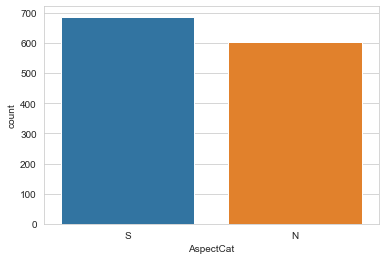

In [32]:
sns.countplot(df['AspectCat'])
plt.show()

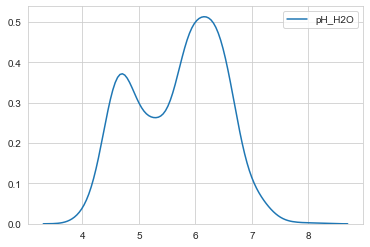

In [40]:
sns.kdeplot(df['pH_H2O'])
plt.show()

C:\Users\Westopher\Coding\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Westopher\Coding\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


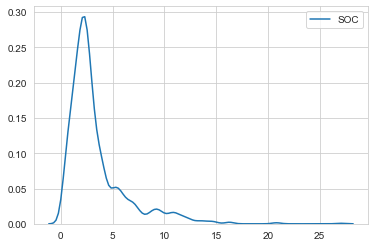

In [36]:
sns.kdeplot(df['SOC'])
plt.show()

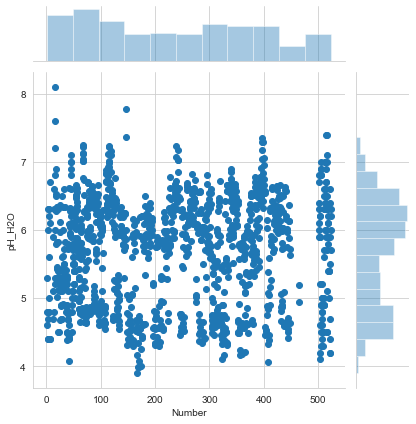

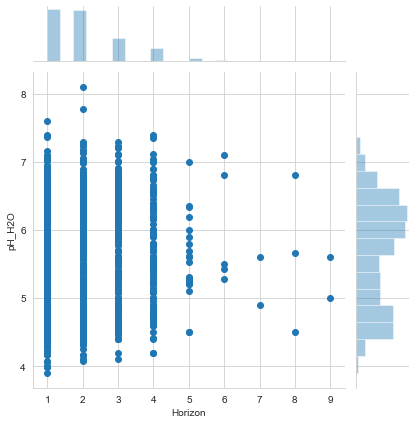

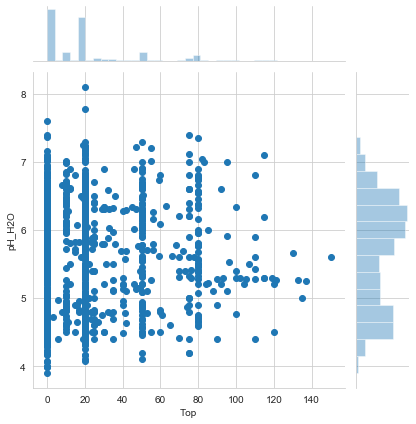

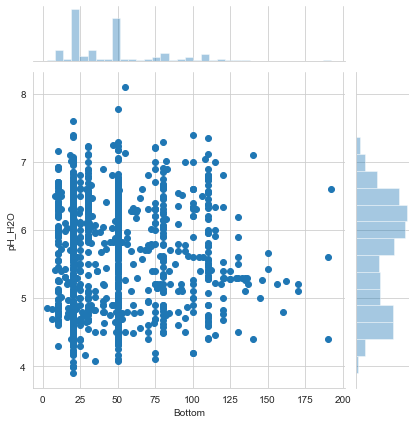

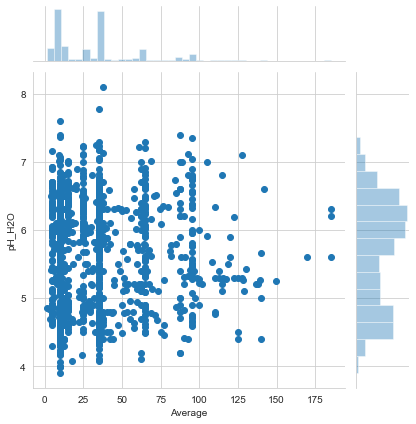

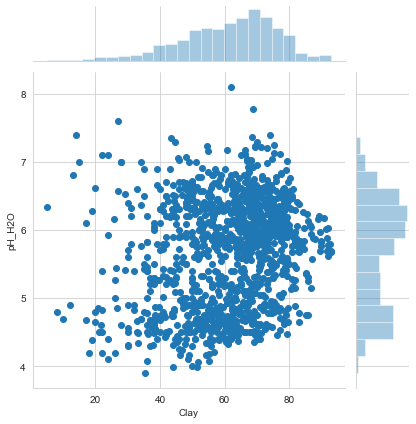

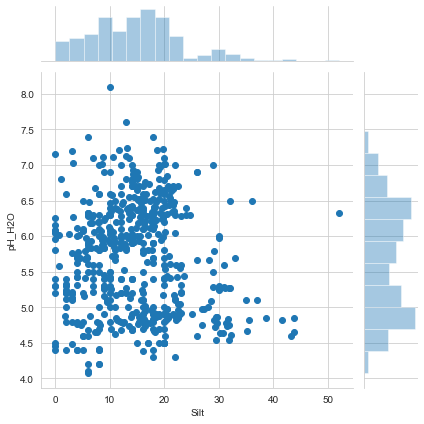

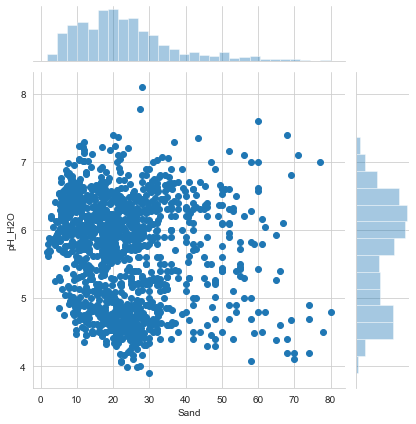

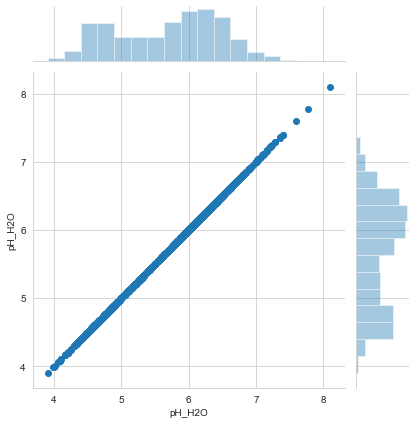

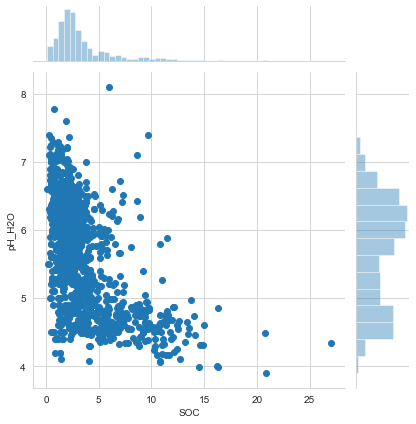

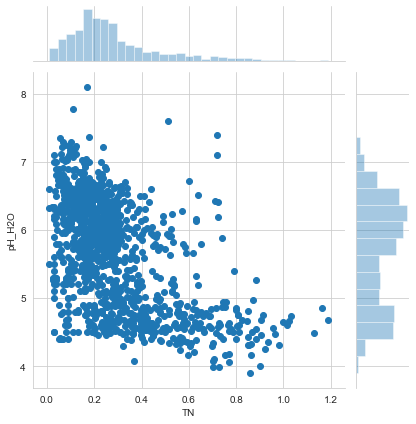

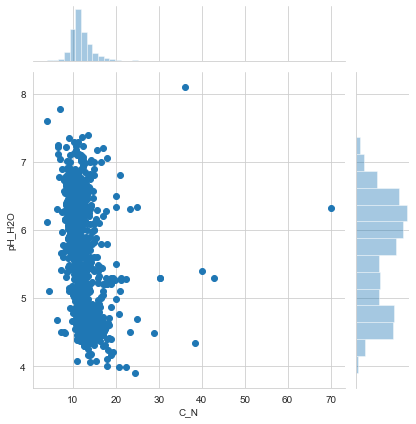

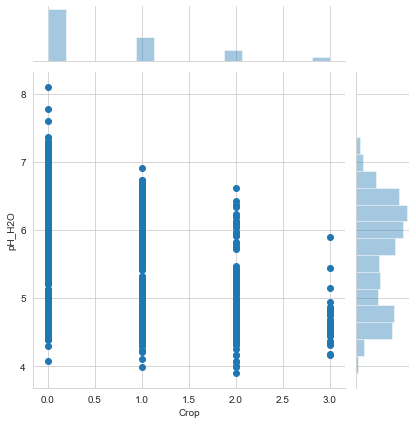

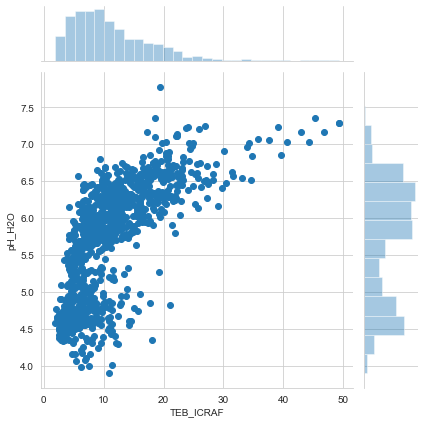

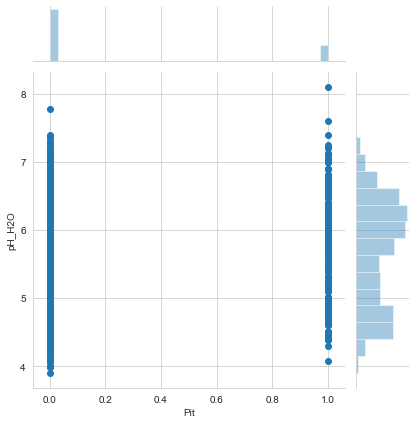

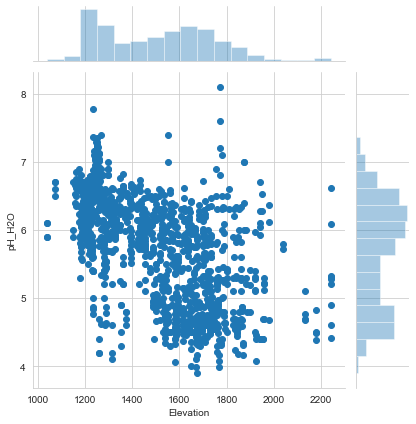

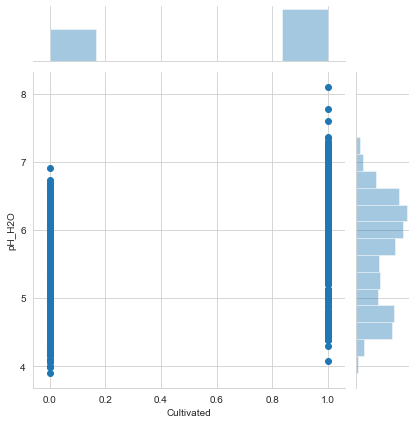

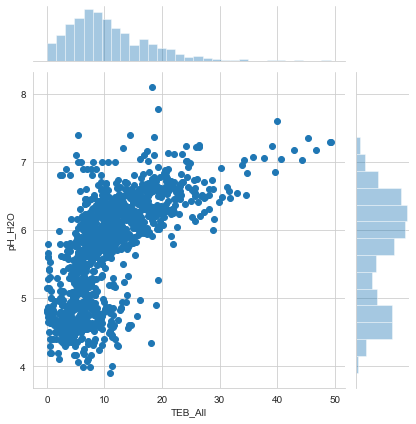

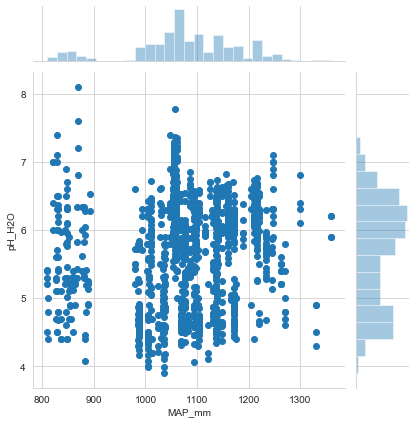

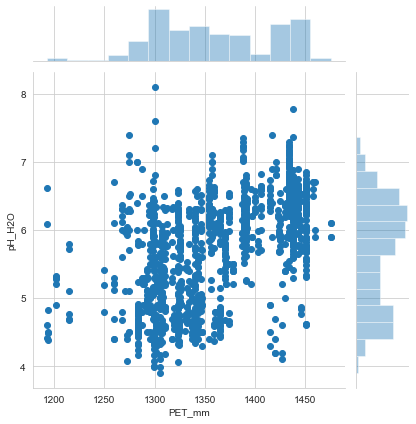

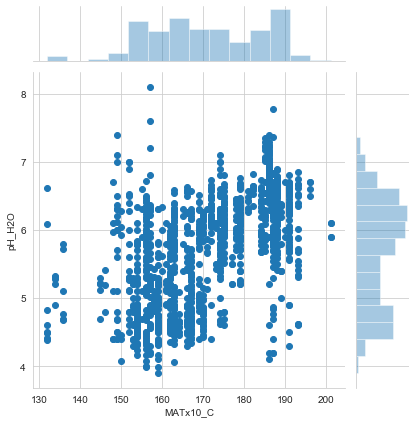

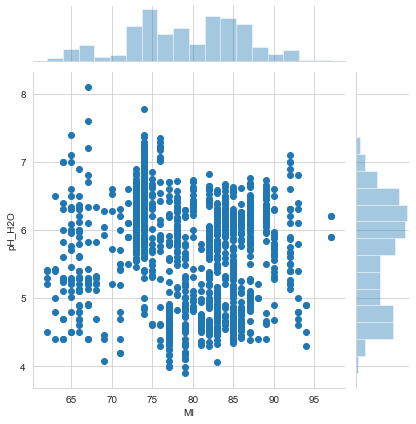

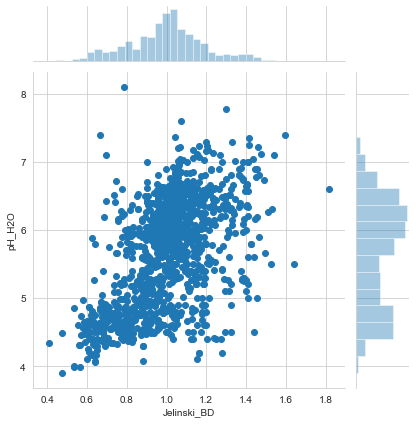

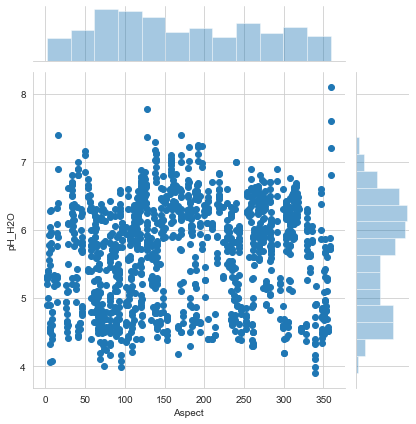

In [46]:
for column in df.describe().columns:
    sns.jointplot(data = df, x = column, y = 'pH_H2O')
    plt.show()

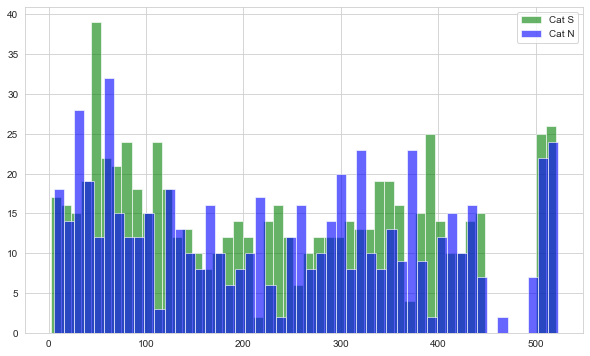

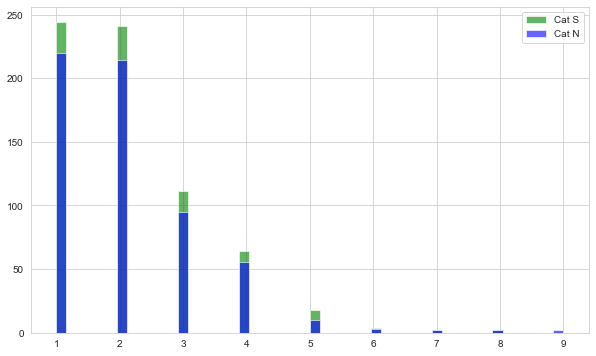

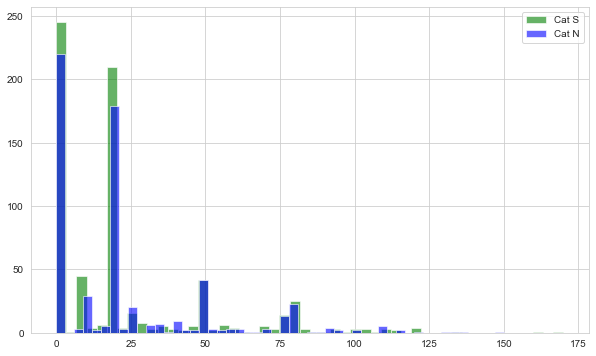

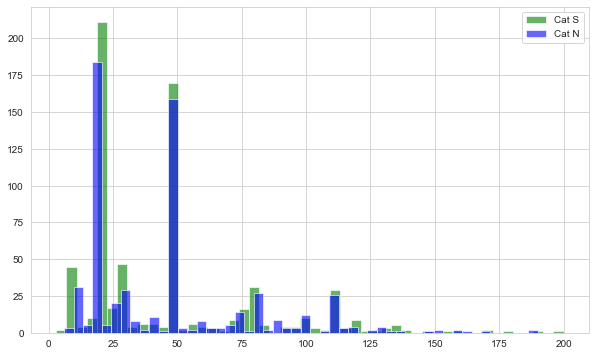

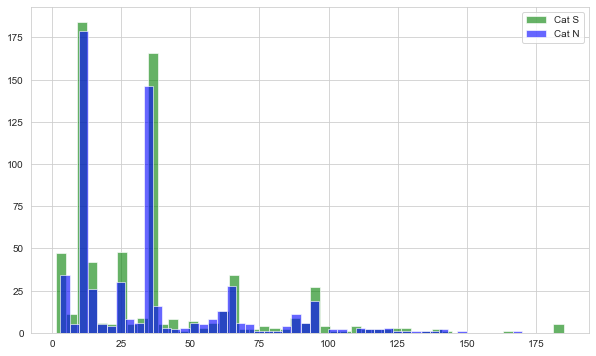

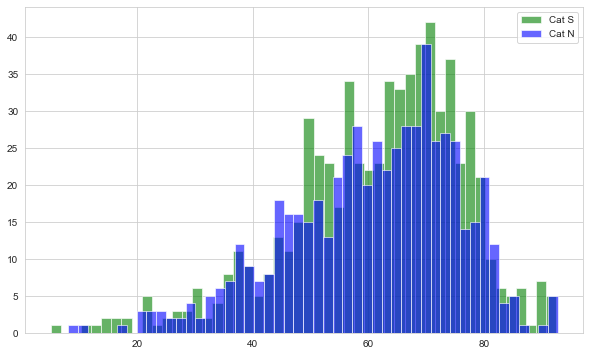

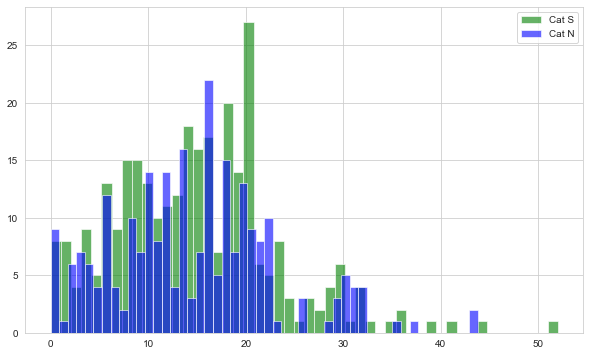

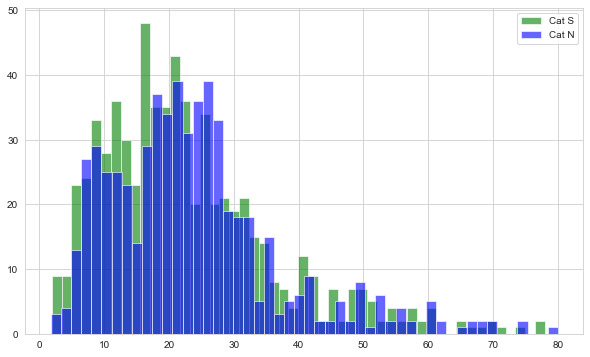

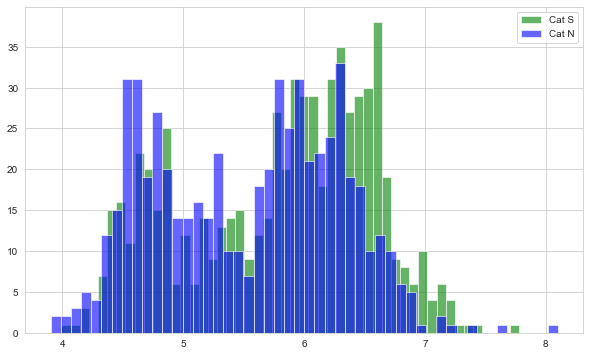

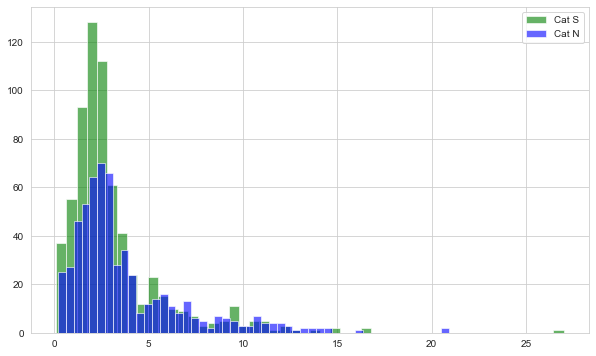

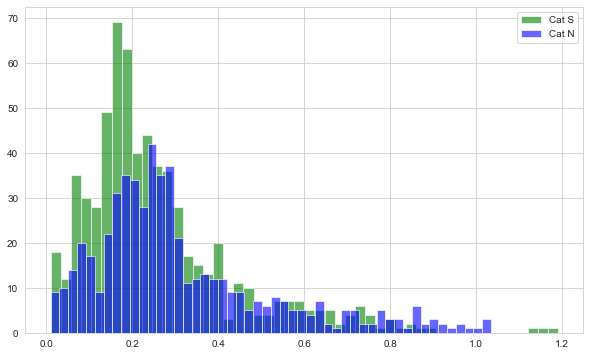

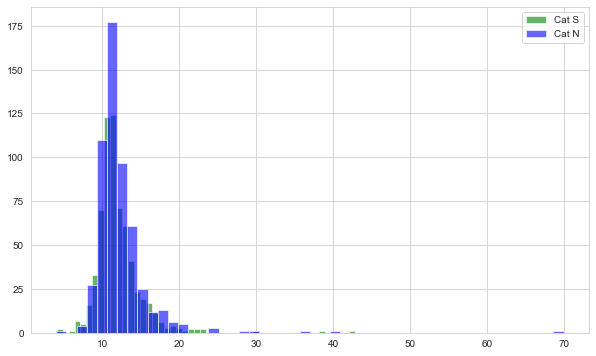

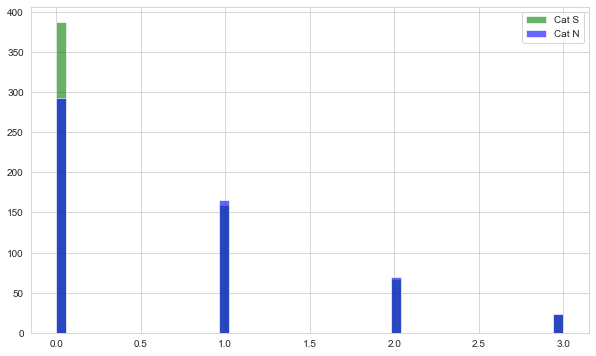

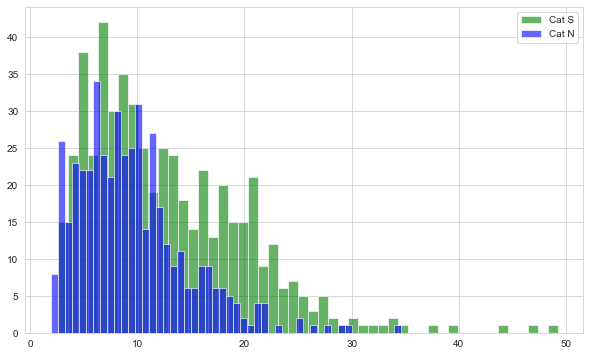

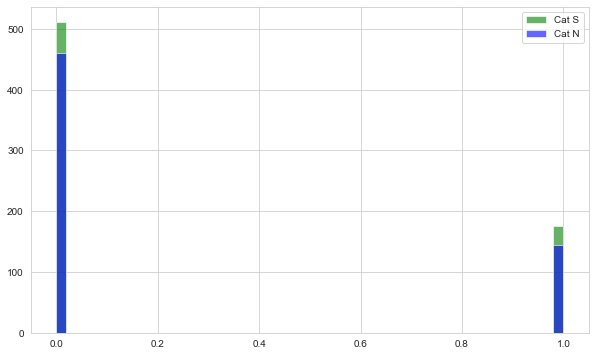

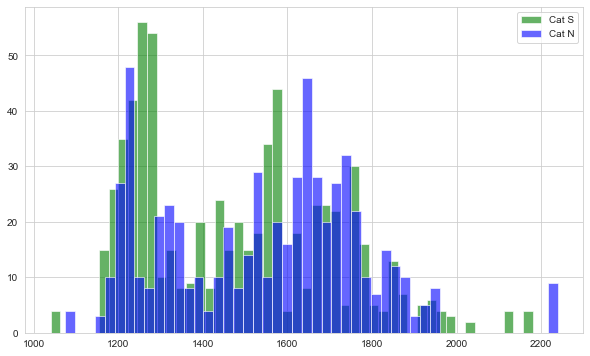

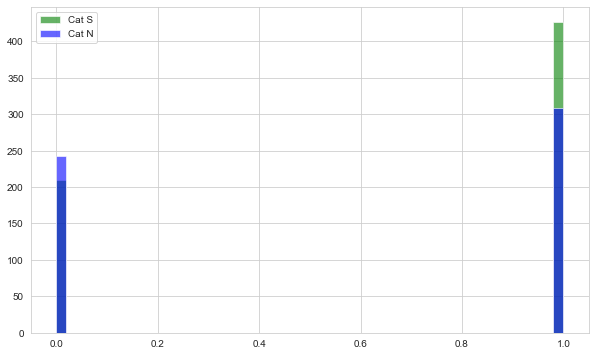

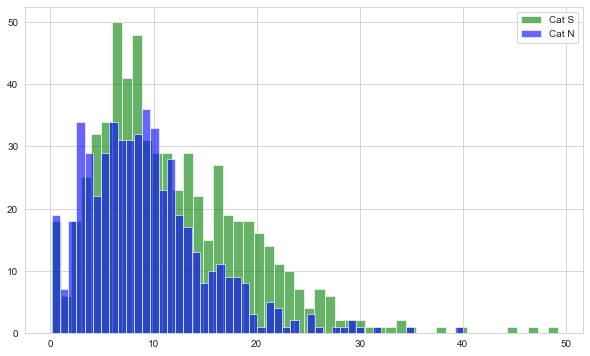

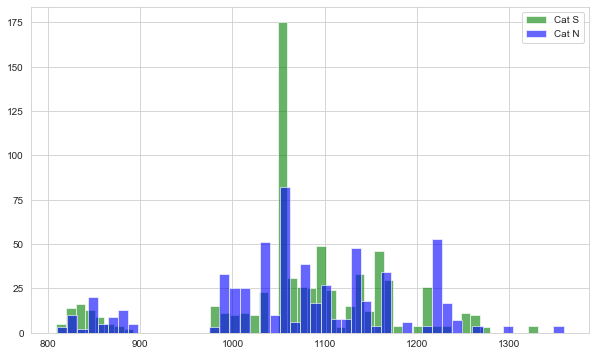

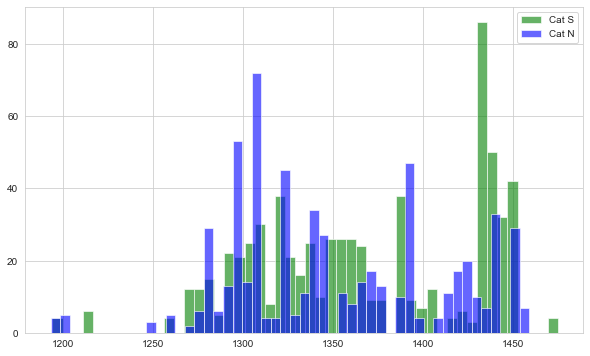

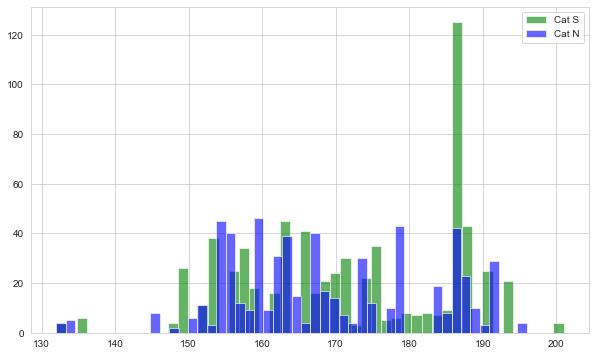

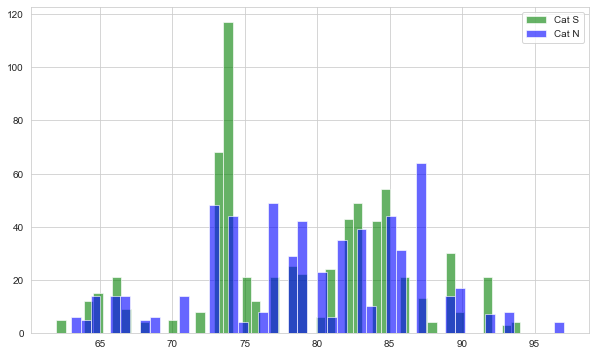

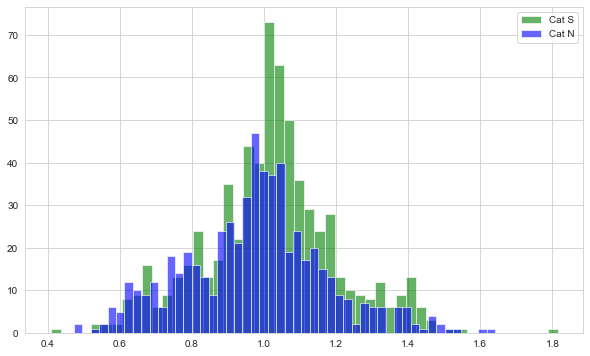

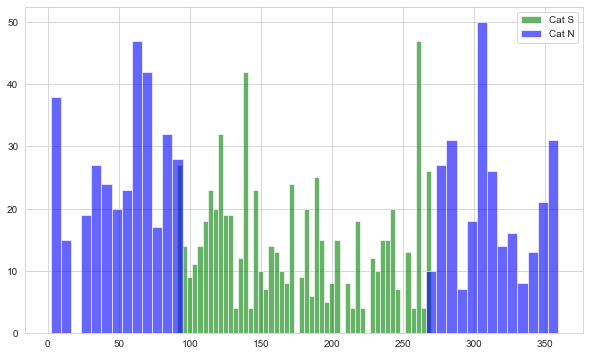

In [61]:
for column in df.describe().columns:
    plt.figure(figsize = (10, 6))
    df[df['AspectCat'] == 'S'][column].hist(bins = 50, color = 'green', label = 'Cat S', alpha = .6)
    df[df['AspectCat'] == 'N'][column].hist(bins = 50, color = 'blue', label = 'Cat N', alpha = .6)
    plt.xlabel = 'column'
    plt.legend()
    plt.show()

In [ ]:
df.update